In [1]:

import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,classification_report

In [2]:
data = pd.read_csv("booking.csv")
data

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


In [3]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [4]:
data['room type'].value_counts()

room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [5]:
data['type of meal'].value_counts()

type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64

In [6]:
data = data.drop(columns = ['Booking_ID', 'date of reservation'])


In [7]:
data

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,Canceled
36281,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,Not_Canceled
36282,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,Not_Canceled
36283,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,Not_Canceled


In [8]:
le = LabelEncoder()

In [9]:
data['meal'] = le.fit_transform(data['type of meal'])
data

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,meal
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled,0
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,3
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled,0
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled,0
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,Canceled,1
36281,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,Not_Canceled,0
36282,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,Not_Canceled,0
36283,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,Not_Canceled,0


In [10]:
data['room'] = le.fit_transform(data['room type'])
data

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,meal,room
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled,0,0
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,3,0
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled,0,0
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled,0,0
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,Canceled,1,0
36281,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,Not_Canceled,0,0
36282,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,Not_Canceled,0,3
36283,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,Not_Canceled,0,0


In [11]:
data = data.drop(columns=['type of meal', 'room type'])

In [12]:
data

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,meal,room
0,1,1,2,5,0,224,Offline,0,0,0,88.00,0,Not_Canceled,0,0
1,1,0,1,3,0,5,Online,0,0,0,106.68,1,Not_Canceled,3,0
2,2,1,1,3,0,1,Online,0,0,0,50.00,0,Canceled,0,0
3,1,0,0,2,0,211,Online,0,0,0,100.00,1,Canceled,0,0
4,1,0,1,2,0,48,Online,0,0,0,77.00,0,Canceled,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,0,346,Online,0,0,0,115.00,1,Canceled,1,0
36281,2,0,1,3,0,34,Online,0,0,0,107.55,1,Not_Canceled,0,0
36282,2,0,1,3,0,83,Online,0,0,0,105.61,1,Not_Canceled,0,3
36283,3,0,0,4,0,121,Offline,0,0,0,96.90,1,Not_Canceled,0,0


In [13]:
data.isnull().sum()

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
car parking space           0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
booking status              0
meal                        0
room                        0
dtype: int64

In [14]:
data['market segment type'].value_counts()

market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

<Axes: xlabel='market segment type', ylabel='count'>

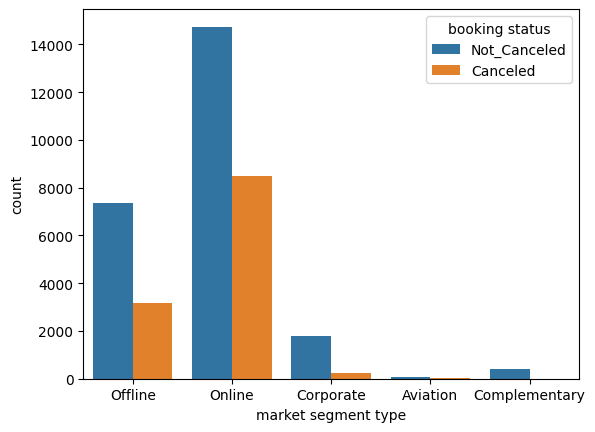

In [15]:
sns.countplot(
    data = data,
    x = 'market segment type',
    hue = 'booking status'
)

In [16]:
data["booking status"] = data["booking status"].replace("Canceled", 1)
data["booking status"] = data["booking status"].replace("Not_Canceled", 0)




C:\Users\Admin\AppData\Local\Temp\ipykernel_7804\1260294313.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["booking status"] = data["booking status"].replace("Not_Canceled", 0)


In [17]:
data['booking type'] = le.fit_transform(data['market segment type'])
data

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,meal,room,booking type
0,1,1,2,5,0,224,Offline,0,0,0,88.00,0,0,0,0,3
1,1,0,1,3,0,5,Online,0,0,0,106.68,1,0,3,0,4
2,2,1,1,3,0,1,Online,0,0,0,50.00,0,1,0,0,4
3,1,0,0,2,0,211,Online,0,0,0,100.00,1,1,0,0,4
4,1,0,1,2,0,48,Online,0,0,0,77.00,0,1,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,0,346,Online,0,0,0,115.00,1,1,1,0,4
36281,2,0,1,3,0,34,Online,0,0,0,107.55,1,0,0,0,4
36282,2,0,1,3,0,83,Online,0,0,0,105.61,1,0,0,3,4
36283,3,0,0,4,0,121,Offline,0,0,0,96.90,1,0,0,0,3


In [18]:
data = data.drop(columns='market segment type')
data

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,booking status,meal,room,booking type
0,1,1,2,5,0,224,0,0,0,88.00,0,0,0,0,3
1,1,0,1,3,0,5,0,0,0,106.68,1,0,3,0,4
2,2,1,1,3,0,1,0,0,0,50.00,0,1,0,0,4
3,1,0,0,2,0,211,0,0,0,100.00,1,1,0,0,4
4,1,0,1,2,0,48,0,0,0,77.00,0,1,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,0,346,0,0,0,115.00,1,1,1,0,4
36281,2,0,1,3,0,34,0,0,0,107.55,1,0,0,0,4
36282,2,0,1,3,0,83,0,0,0,105.61,1,0,0,3,4
36283,3,0,0,4,0,121,0,0,0,96.90,1,0,0,0,3


<Axes: xlabel='number of adults', ylabel='Count'>

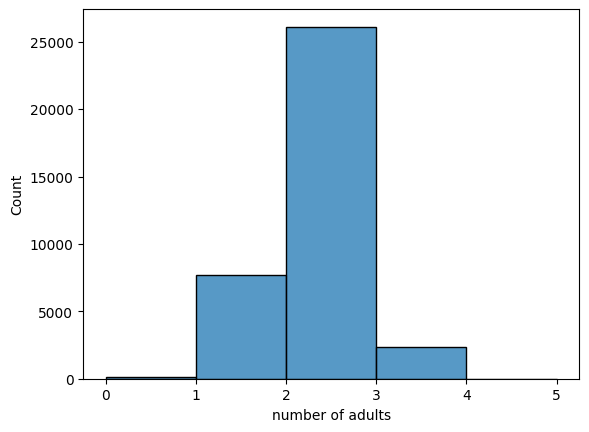

In [19]:
sns.histplot(data["number of adults"],bins=range(0,6))


<Axes: xlabel='number of children', ylabel='Count'>

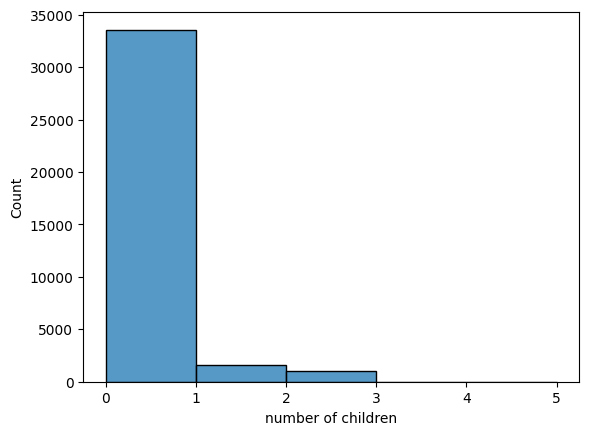

In [20]:
sns.histplot(data["number of children"],bins=range(0,6))

<Axes: xlabel='number of weekend nights', ylabel='Count'>

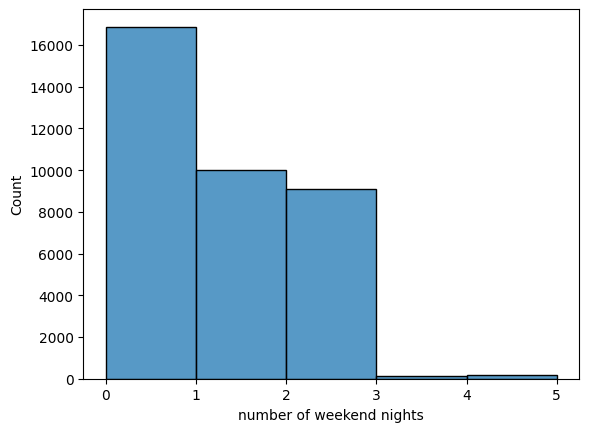

In [21]:
sns.histplot(data["number of weekend nights"],bins=range(0,6))

<Axes: xlabel='number of week nights', ylabel='Count'>

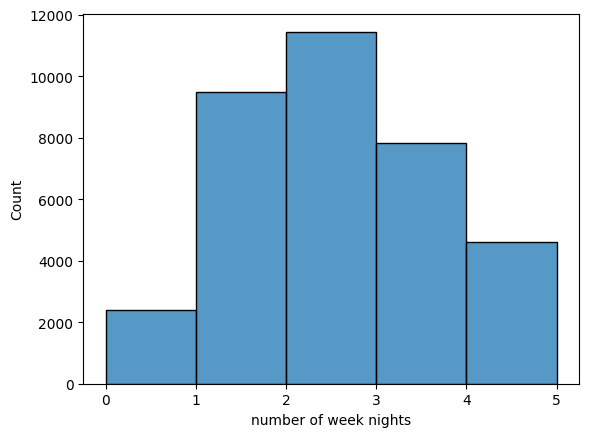

In [22]:
sns.histplot(data["number of week nights"],bins=range(0,6))

<Axes: xlabel='car parking space', ylabel='Count'>

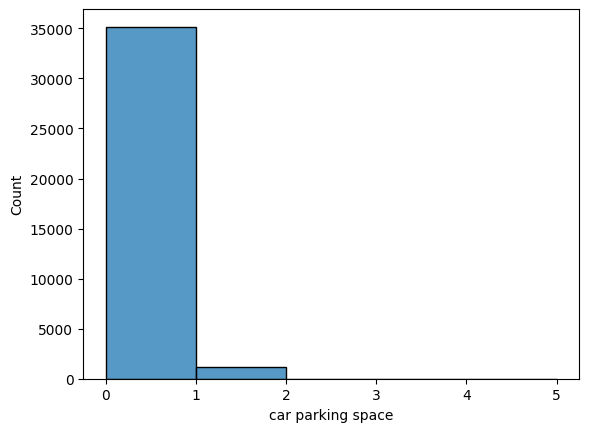

In [23]:
sns.histplot(data["car parking space"],bins=range(0,6))

<Axes: xlabel='lead time', ylabel='Count'>

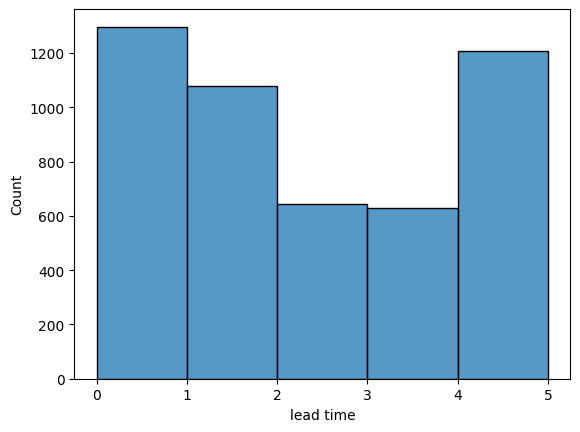

In [24]:
sns.histplot(data["lead time"],bins=range(0,6))

<Axes: xlabel='repeated', ylabel='Count'>

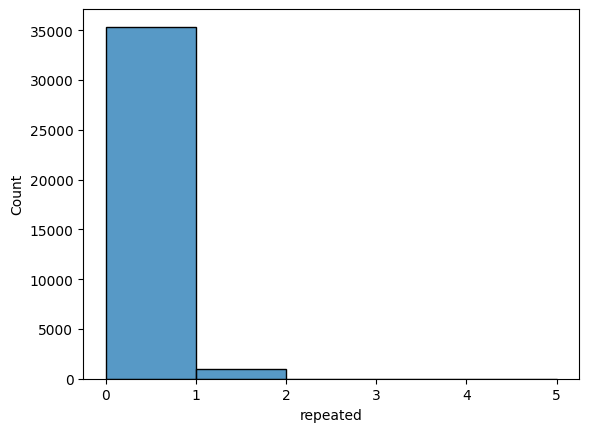

In [25]:
sns.histplot(data["repeated"],bins=range(0,6))

<Axes: xlabel='booking status', ylabel='Count'>

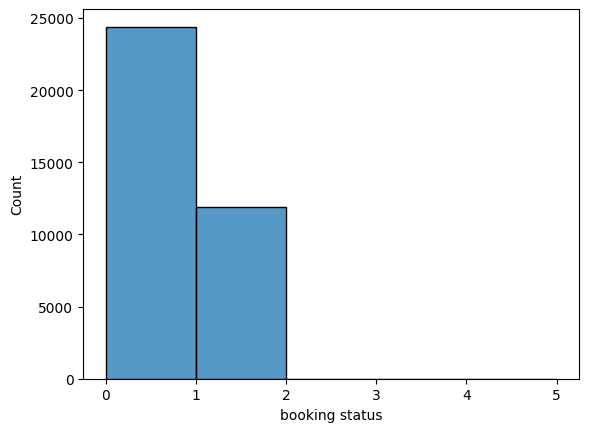

In [26]:
sns.histplot(data["booking status"],bins=range(0,6))

<Axes: xlabel='meal', ylabel='Count'>

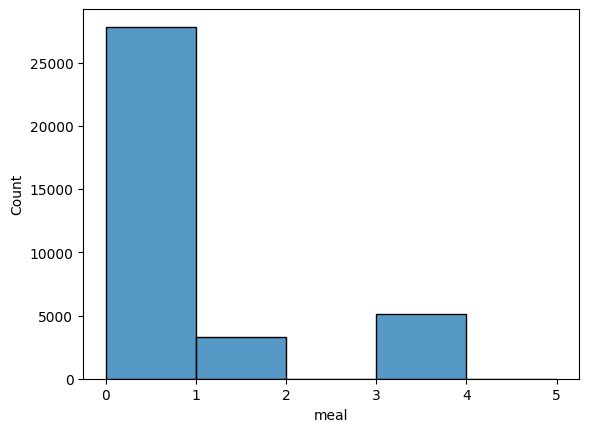

In [27]:
sns.histplot(data["meal"],bins=range(0,6))

<Axes: xlabel='room', ylabel='Count'>

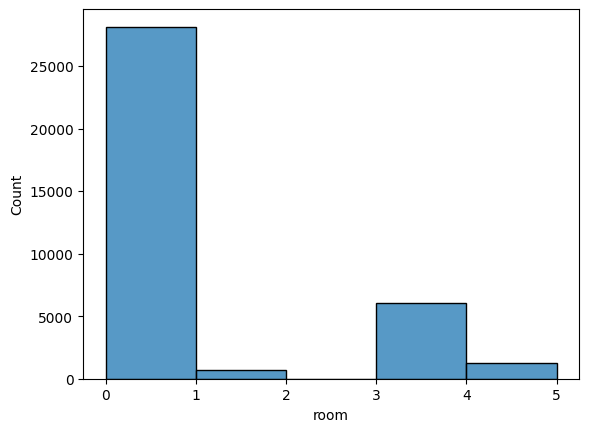

In [28]:
sns.histplot(data["room"],bins=range(0,6))

<Axes: xlabel='repeated', ylabel='count'>

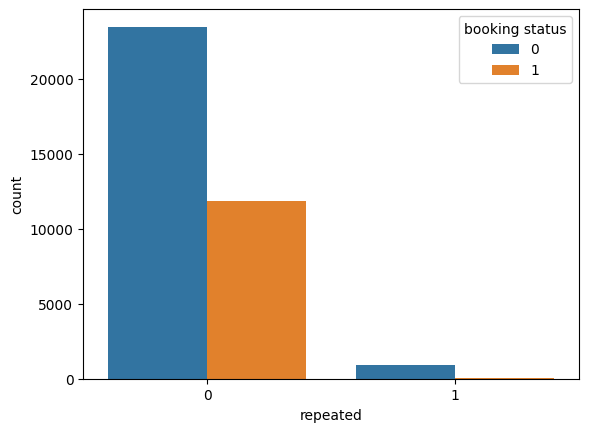

In [29]:
sns.countplot(
    x = "repeated",
    hue = "booking status",
    data = data
)

In [30]:
data.corr()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,booking status,meal,room,booking type
number of adults,1.000000,-0.020027,0.103316,0.105416,0.011467,0.097014,-0.192175,-0.047395,-0.119106,0.296832,0.189317,0.086774,0.025359,0.270501,0.314021
number of children,-0.020027,1.000000,0.029536,0.024680,0.034198,-0.047058,-0.036371,-0.016398,-0.021201,0.337491,0.124363,0.033007,-0.086872,0.363802,0.130536
number of weekend nights,0.103316,0.029536,1.000000,0.179548,-0.031102,0.046510,-0.067096,-0.020687,-0.026307,-0.004565,0.060432,0.061489,-0.027293,0.057334,0.129048
number of week nights,0.105416,0.024680,0.179548,1.000000,-0.048814,0.149600,-0.099782,-0.030089,-0.049354,0.022751,0.046136,0.092824,-0.083478,0.094142,0.112940
car parking space,0.011467,0.034198,-0.031102,-0.048814,1.000000,-0.066444,0.110916,0.027109,0.063814,0.061310,0.087889,-0.086179,-0.012997,0.038778,-0.003734
lead time,0.097014,-0.047058,0.046510,0.149600,-0.066444,1.000000,-0.135966,-0.045718,-0.078126,-0.062578,-0.101604,0.438491,-0.060316,-0.107830,-0.007080
repeated,-0.192175,-0.036371,-0.067096,-0.099782,0.110916,-0.135966,1.000000,0.390811,0.539157,-0.174881,-0.011834,-0.107277,-0.062991,-0.025819,-0.337748
P-C,-0.047395,-0.016398,-0.020687,-0.030089,0.027109,-0.045718,0.390811,1.000000,0.468148,-0.063334,-0.003323,-0.033725,-0.011623,-0.007934,-0.074228
P-not-C,-0.119106,-0.021201,-0.026307,-0.049354,0.063814,-0.078126,0.539157,0.468148,1.000000,-0.113673,0.027363,-0.060174,-0.038180,-0.008136,-0.207140
average price,0.296832,0.337491,-0.004565,0.022751,0.061310,-0.062578,-0.174881,-0.063334,-0.113673,1.000000,0.184468,0.142433,-0.069268,0.469908,0.375597


<Axes: >

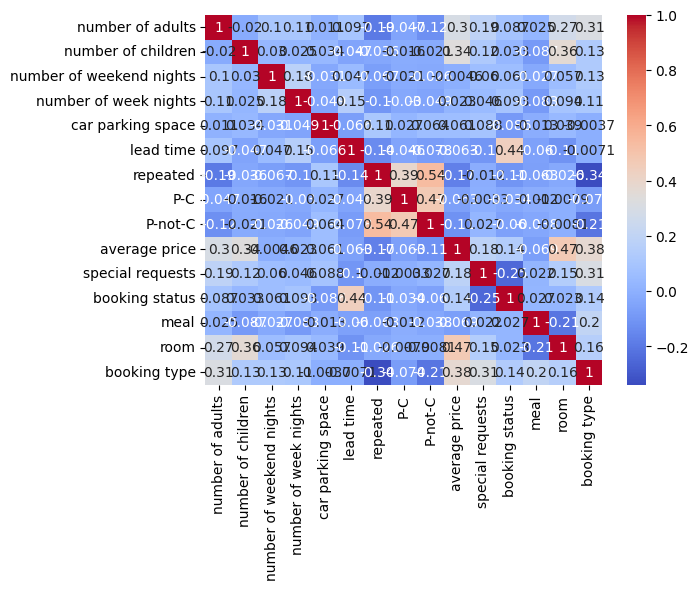

In [31]:
sns.heatmap(
    data = data.corr(),
    annot = True,
    cmap = 'coolwarm'
)

In [32]:
def remove_outliers(data,col):
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)

  IQR = Q3-Q1

  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3+1.5*IQR

  filtered_data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
  return filtered_data

In [33]:
data=remove_outliers(data,'number of adults')
data=remove_outliers(data,'number of children')
data=remove_outliers(data,'number of weekend nights')
data=remove_outliers(data,'number of week nights')
data=remove_outliers(data,'lead time')
data=remove_outliers(data,'average price')

In [34]:
data

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,booking status,meal,room,booking type
9,2,0,0,5,0,44,0,0,0,133.44,3,0,0,3,4
12,2,0,2,1,0,30,0,0,0,88.00,0,1,3,0,4
14,2,0,0,2,0,47,0,0,0,94.50,2,0,0,0,4
15,2,0,0,2,0,256,0,0,0,115.00,1,1,1,0,4
17,2,0,1,3,0,1,0,0,0,96.00,1,0,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36278,2,0,0,2,0,211,0,0,0,100.00,0,1,0,0,4
36279,2,0,1,1,0,48,0,0,0,94.50,0,1,3,0,4
36281,2,0,1,3,0,34,0,0,0,107.55,1,0,0,0,4
36282,2,0,1,3,0,83,0,0,0,105.61,1,0,0,3,4


In [35]:
X = data.drop(columns = "booking status")
X

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,meal,room,booking type
9,2,0,0,5,0,44,0,0,0,133.44,3,0,3,4
12,2,0,2,1,0,30,0,0,0,88.00,0,3,0,4
14,2,0,0,2,0,47,0,0,0,94.50,2,0,0,4
15,2,0,0,2,0,256,0,0,0,115.00,1,1,0,4
17,2,0,1,3,0,1,0,0,0,96.00,1,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36278,2,0,0,2,0,211,0,0,0,100.00,0,0,0,4
36279,2,0,1,1,0,48,0,0,0,94.50,0,3,0,4
36281,2,0,1,3,0,34,0,0,0,107.55,1,0,0,4
36282,2,0,1,3,0,83,0,0,0,105.61,1,0,3,4


In [36]:
y = data['booking status']
y

9        0
12       1
14       0
15       1
17       0
        ..
36278    1
36279    1
36281    0
36282    0
36284    0
Name: booking status, Length: 22295, dtype: int64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [38]:
X_train

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,meal,room,booking type
32033,2,0,1,5,0,82,0,0,0,72.25,1,3,0,4
18176,2,0,0,2,0,23,0,0,0,130.00,1,0,0,4
19197,2,0,1,1,0,174,0,0,0,70.00,0,0,0,3
12718,2,0,0,2,0,44,0,0,0,93.60,1,3,0,4
32165,2,0,1,3,0,65,0,0,0,80.75,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19364,2,0,1,0,0,5,0,0,0,75.00,1,3,0,4
35182,2,0,0,3,0,5,0,0,0,125.00,0,1,0,3
8628,2,0,1,2,0,58,0,0,0,123.30,2,0,3,4
1349,2,0,1,1,0,75,0,0,0,79.20,1,3,0,4


In [39]:
treemodel = DecisionTreeClassifier(max_depth=5)

In [40]:
treemodel.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

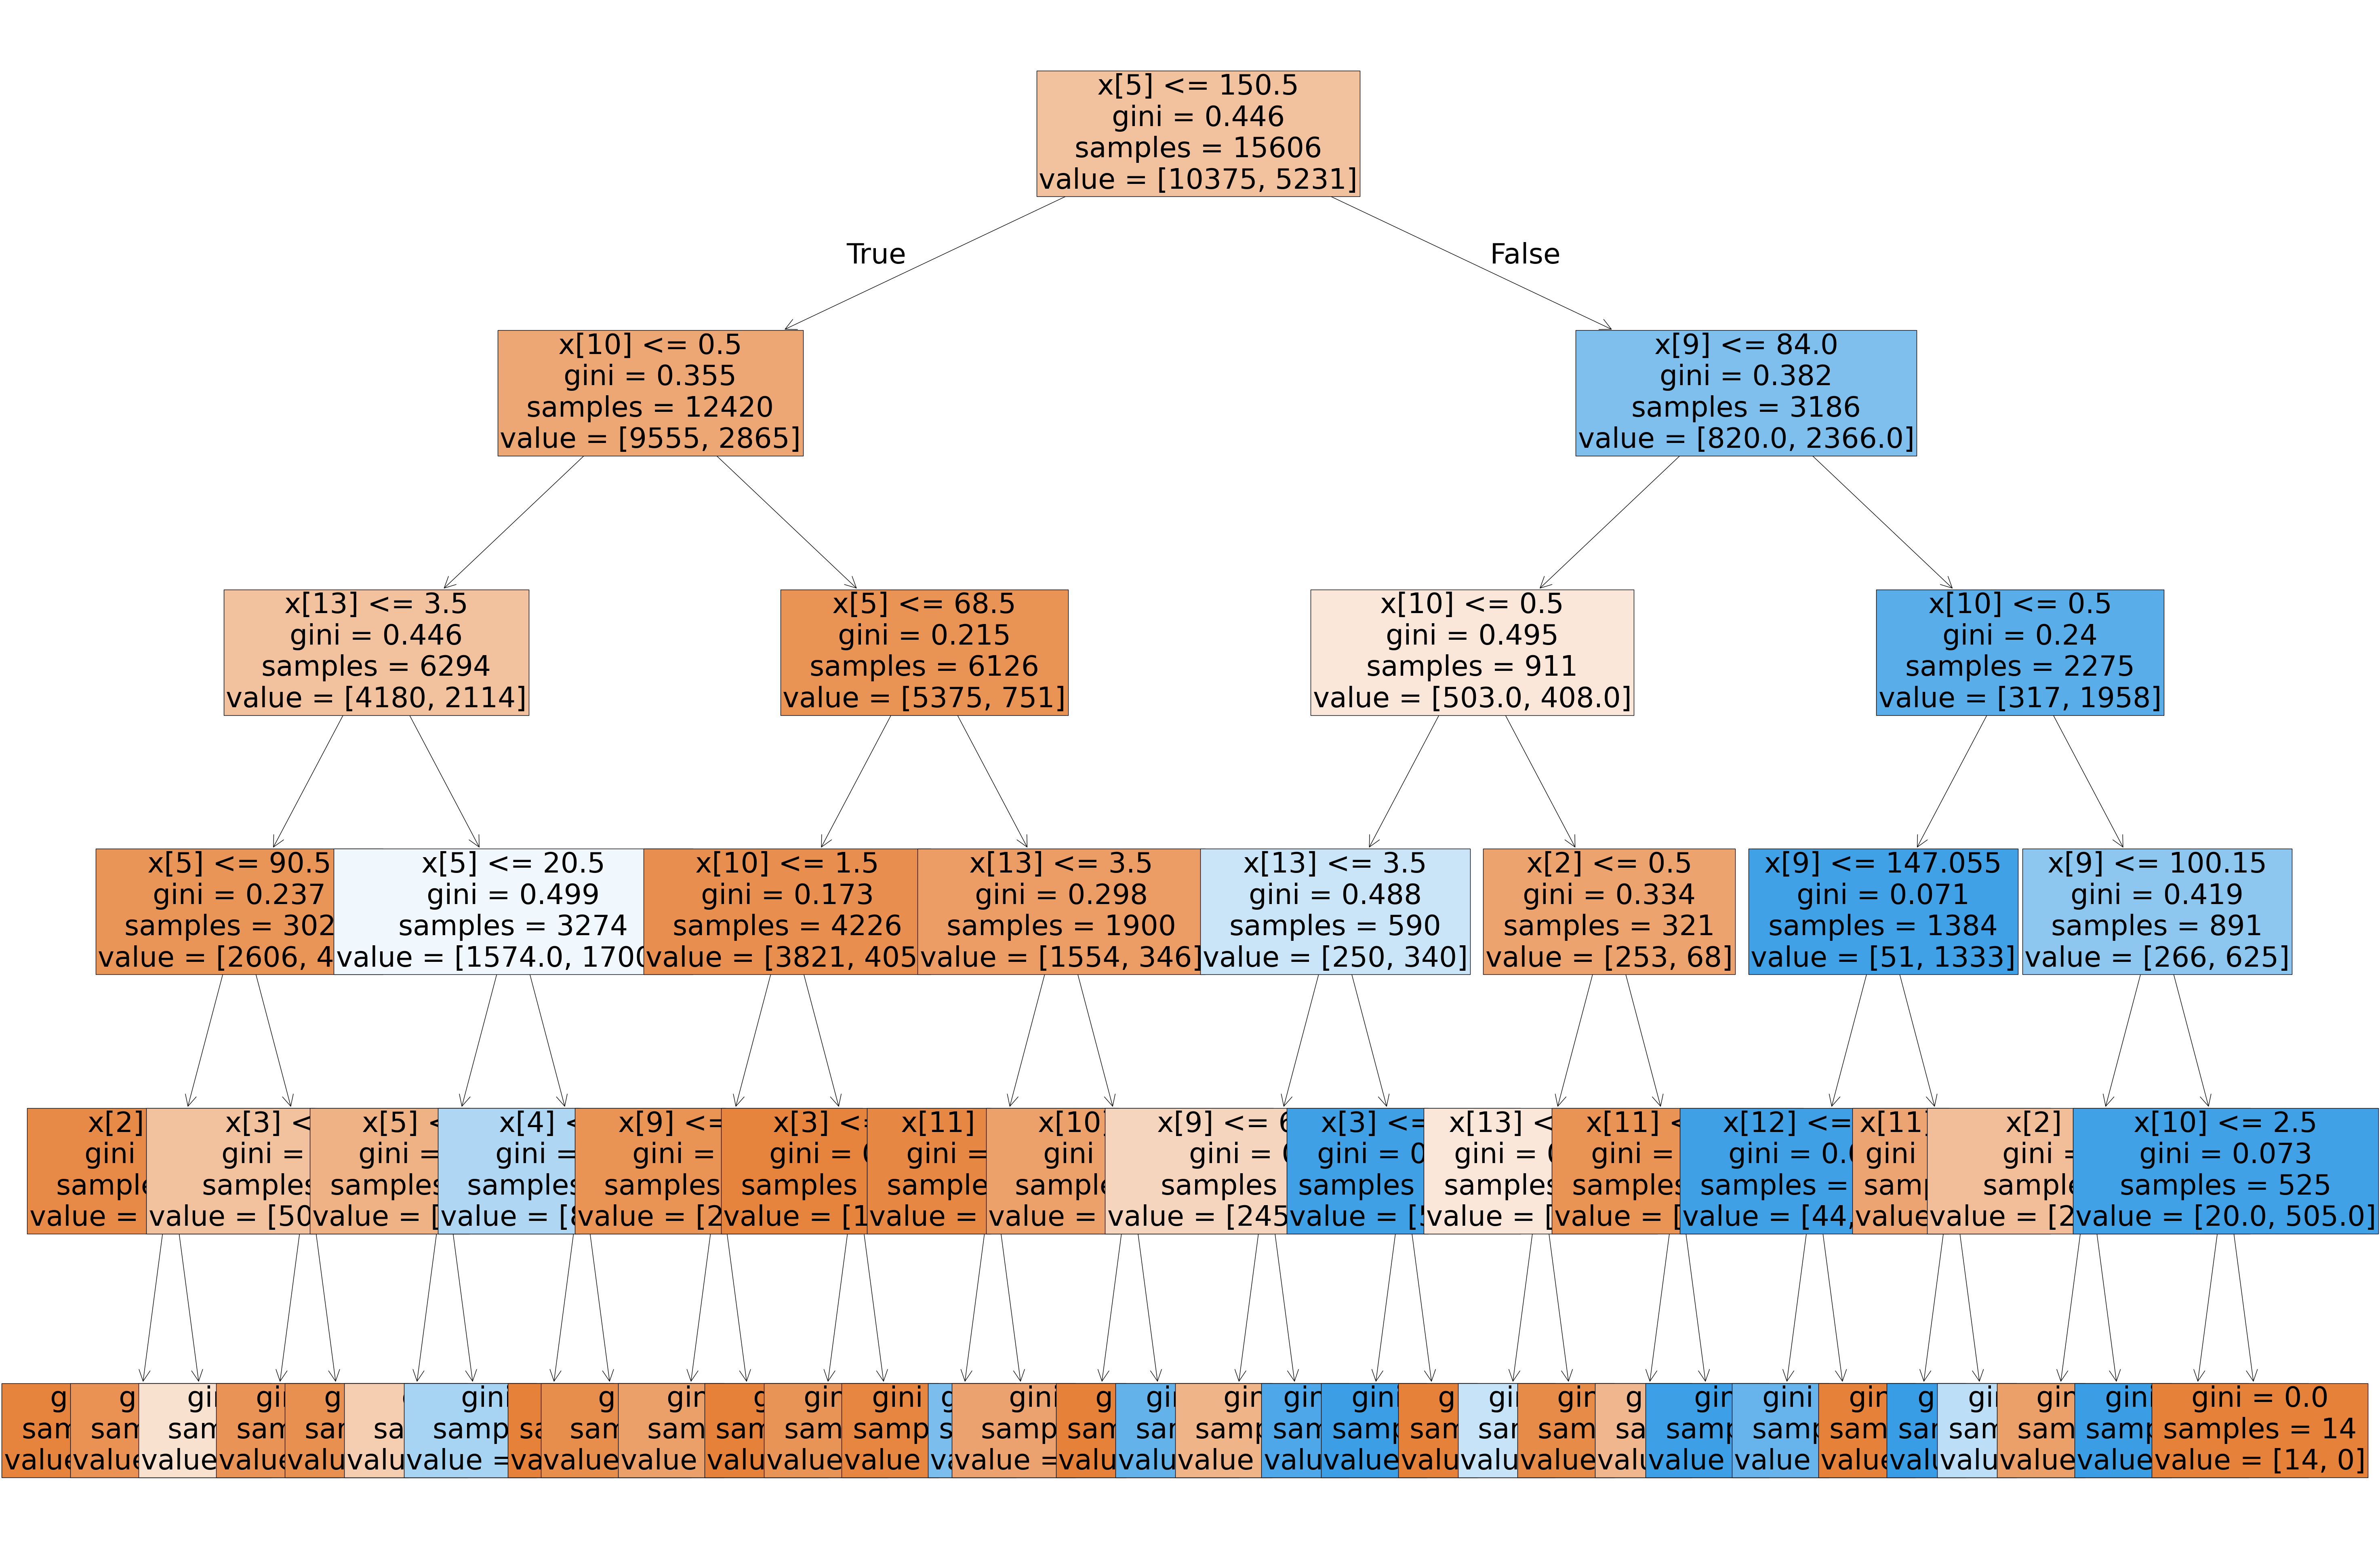

In [41]:
plt.rcParams['figure.figsize'] = (70, 50)
tree.plot_tree(treemodel, 
               filled=True, 
               fontsize=50) 

plt.savefig('large_decision_tree.png', dpi=100)
plt.show()

In [42]:
y_pred=treemodel.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(6689,))

In [43]:
score=accuracy_score(y_pred,y_test)
print(score)

0.8349529077590073


In [44]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      4794
           1       0.68      0.80      0.73      1895

    accuracy                           0.83      6689
   macro avg       0.80      0.83      0.81      6689
weighted avg       0.85      0.83      0.84      6689



In [45]:
parameter = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1,2,3,4,5],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [46]:
from sklearn.model_selection import GridSearchCV
treemodel=DecisionTreeClassifier()
cv=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')
cv.fit(X_train,y_train)

C:\Users\Admin\AppData\Roaming\Python\Python314\site-packages\sklearn\model_selection\_validation.py:490: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Roaming\Python\Python314\site-packages\sklearn\model_selection\_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\AppData\Roaming\Python\Python314\site-packages\sklearn\base.py", line 1329, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\Admin\AppData\Roaming\Pyth

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'criterion': ['gini', 'entropy', ...], 'max_depth': [1, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fol

In [47]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [48]:
cm=confusion_matrix(y_test,y_pred)

In [49]:
plt.rcParams['figure.figsize'] = (10, 6)
display=ConfusionMatrixDisplay(cm)display.plot()
plot.show()

SyntaxError: invalid syntax (2209028526.py, line 2)